In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from glob import glob
from tqdm import tqdm
import json

from matplotlib import pyplot as plt

In [ ]:
# Loading train/test csv file containing depression presence/absence and user id
# Parsing user id from train/test csv file

train = pd.read_csv('/kaggle/input/2021-ml-tp8/train_Y.csv')
submit = pd.read_csv('/kaggle/input/2021-ml-tp8/sample_submit.csv')

In [ ]:
train_user = train['user']
test_user = submit['user']
y_train = train['label'].to_numpy()

In [ ]:
total_user = pd.concat([train_user, test_user])
total_user = total_user.sort_values().reset_index(drop=True)

- Import EMA data related to Sleep, Social, and Activity
- At this time, only the EMA data corresponding to the user id is loaded.

In [ ]:
sleep = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Sleep/*.json'))
social = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Social/*.json'))
activity = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Activity/*.json'))

In [ ]:
tmp = list()

for i in range(len(sleep)) :
    for k in range(len(total_user)) : 
        if total_user[k] in sleep[i] :
            tmp.append(sleep[i])

sleep = np.array(tmp)

tmp = list()

for i in range(len(social)) :
    for k in range(len(total_user)) : 
        if total_user[k] in social[i] :
            tmp.append(social[i])

social = np.array(tmp)

tmp = list()

for i in range(len(activity)) :
    for k in range(len(total_user)) : 
        if total_user[k] in activity[i] :
              tmp.append(activity[i])

activity = np.array(tmp)

# [1-1] EMA data parsing - Sleep  

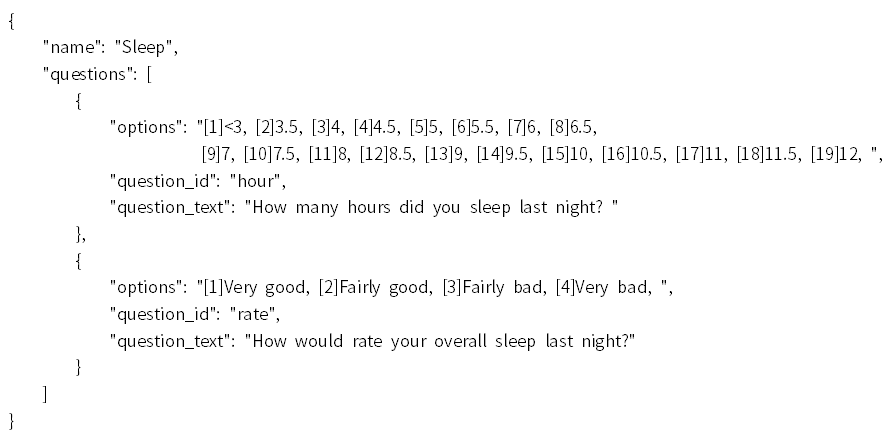

In [ ]:
# 1. Load files stored in sleep folder one by one through json load.
# 2. Parse data in which 'question_id' is 'hour' and 'rate' among the user's responses.
# 3. Since each response is an index value, it is converted into an actual value corresponding to the corresponding index.

people_hour = list()
people_rate = list()

for sp in tqdm(sleep) : 
  person_hour = list()
  person_rate = list()
    
  with open(sp) as json_file:
    sleep_data = json.load(json_file)
    
  for res in sleep_data :
    if 'hour' in res :
        def real_hour(x):
            # input: hour index of sleep_data
            # output: Real data of hour index return, return 'NaN' if no corresponding index or answer is found.
            return {'1': '3', '2': '3.5', '3':'4','4':'4.5','5': '5', '6':'5.5', '7':'6', '8':'6.5', '9':'7',
                    '10':'7.5','11':'8','12':'8.5','13':'9','14':'9.5','15':'10','16':'10.5','17':'11',
                    '18':'11.5','19':'12'}.get(x, 'NaN')
        
        person_hour.append(real_hour(res['hour']))
        # Append the return value of the real_hour function using the parsed index value as input to the person_hour list

    if 'rate' in res :
        def real_rate(x):
            # 대응되는 인덱스 별 실제값 설정하는 함수
            # input: rate index of sleep_data
            # output: Real data of hour index return, return 'NaN' if no corresponding index or answer is found.
            return {'1':'4','2':'3','3':'2','4':'1'}.get(x,'NaN')
        
        person_rate.append(real_rate(res['rate']))
        # Append the return value of the real_rate function using the parsed index value as input to the person_rate list

people_hour.append(person_hour)
people_rate.append(person_rate)
    

# [1-2] EMA data parsing - Social  

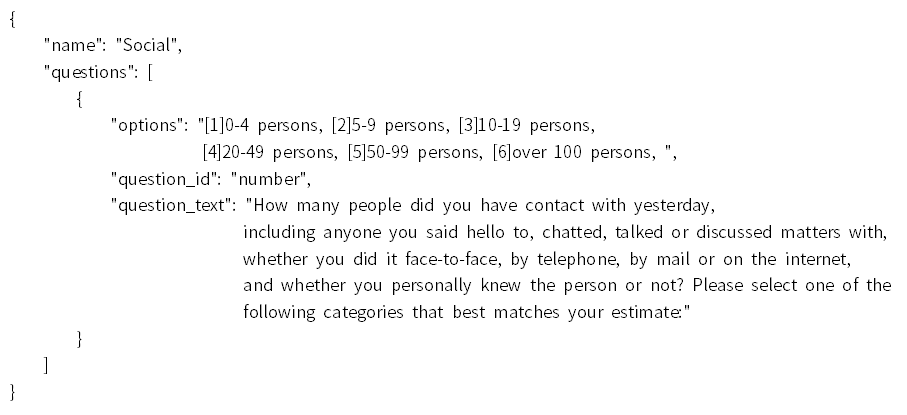

In [ ]:
# 1. Load files stored in social folder one by one through json load.
# 2. Parse data in which 'question_id' is 'number' among the user's responses.
# 3. Since each response is an index value, it is converted into an actual value corresponding to the corresponding index.


people_contact = list() 

for soc in tqdm(social) :
  person_contact = list()
  with open(soc) as json_file:
    social_data = json.load(json_file)
  for res in social_data :
    if 'number' in res :
        def real_number(x):
            # input: number index of social_data
            # output: number index 별 실제값 return, 대응되는 인덱스 또는 답변이 없다면 'NaN' return.
            return {'1':'0','2':'5','3':'10','4':'20','5':'50','6':'100'}.get(x,'NaN')
        person_contact.append(real_number(res['number']))
        # 파싱된 index 값을 input으로 사용한 real_number 함수의 return 값을 person_contact 리스트에 append

  people_contact.append(person_contact)

# [1-3] EMA data parsing - Activity  

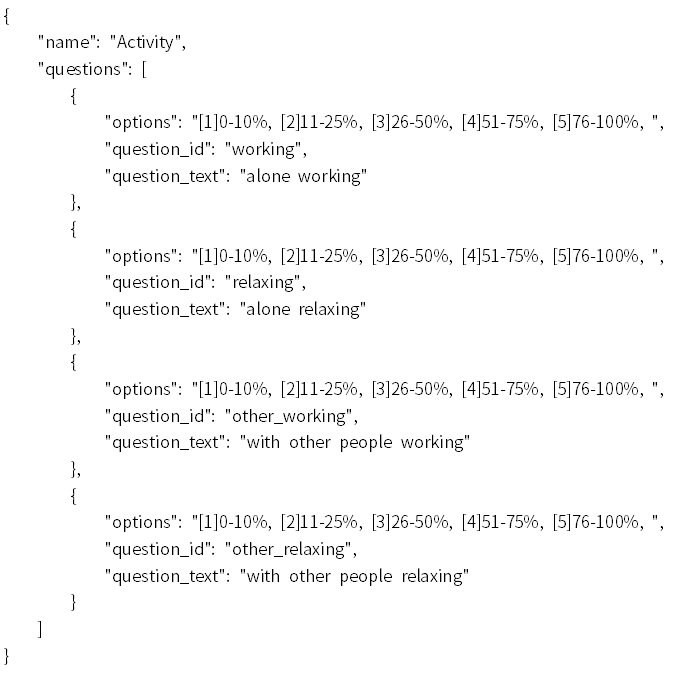

In [ ]:
# 1. Load files stored in activity folder one by one through json load.
# 2. Parse data in which 'question_id' is 'other_relaxing','other_working','relaxing','working' among the user's responses.
# 3. Since each response is an index value, it is converted into an actual value corresponding to the corresponding index.

people_work_alone = list() 
people_work_other = list()
people_relaxing_alone = list() 
people_relaxing_other = list()

for act in tqdm(activity) :

  person_work_alone = list() 
  person_work_other = list()
  person_relaxing_alone = list() 
  person_relaxing_other = list()

  with open(act) as json_file:
    activity_data = json.load(json_file)

  for res in activity_data :
    
    if 'other_relaxing' in res :
        def real_data(x):
            return {'1':'0','2':'0.11', '3':'0.26', '4':'0.51','5':'0.76'}.get(x, 'NaN')
        
        person_relaxing_other.append(real_data(res['other_relaxing']))

    if 'other_working' in res :
        def real_data(x):
            return {'1':'0','2':'0.11', '3':'0.26', '4':'0.51','5':'0.76'}.get(x, 'NaN')
    
        person_work_other.append(real_data(res['other_working']))

    if 'relaxing' in res :
        def real_data(x):
            return {'1':'0','2':'0.11', '3':'0.26', '4':'0.51','5':'0.76'}.get(x, 'NaN')
    
        person_relaxing_alone.append(real_data(res['relaxing']))

    if 'working' in res :
        def real_data(x):
            return {'1':'0','2':'0.11', '3':'0.26', '4':'0.51','5':'0.76'}.get(x, 'NaN')
    
        person_work_alone.append(real_data(res['working']))


  people_relaxing_other.append(person_relaxing_other)
  people_work_other.append(person_work_other)
  people_relaxing_alone.append(person_relaxing_alone)
  people_work_alone.append(person_work_alone)

In [ ]:
student_sleep = pd.DataFrame(people_hour).astype('float64')
student_sleep_rate = pd.DataFrame(people_rate).astype('float64')
student_contact = pd.DataFrame(people_contact).astype('float64')
student_working_alone = pd.DataFrame(people_work_alone).astype('float64')
student_working_other = pd.DataFrame(people_work_other).astype('float64')
student_relaxing_alone = pd.DataFrame(people_relaxing_alone).astype('float64')
student_relaxing_other = pd.DataFrame(people_relaxing_other).astype('float64')

student_sleep['uid'] = total_user
student_sleep_rate['uid'] = total_user
student_contact['uid'] = total_user
student_working_alone['uid'] = total_user
student_working_other['uid'] = total_user
student_relaxing_alone['uid'] = total_user
student_relaxing_other['uid'] = total_user

student_sleep = student_sleep[(['uid']+list(range(0,student_sleep.shape[1]-1)))]
student_sleep_rate = student_sleep_rate[(['uid']+list(range(0,student_sleep_rate.shape[1]-1)))]
student_contact = student_contact[(['uid']+list(range(0,student_contact.shape[1]-1)))]
student_working_alone = student_working_alone[(['uid']+list(range(0,student_working_alone.shape[1]-1)))]
student_working_other = student_working_other[(['uid']+list(range(0,student_working_other.shape[1]-1)))]
student_relaxing_alone = student_relaxing_alone[(['uid']+list(range(0,student_relaxing_alone.shape[1]-1)))]
student_relaxing_other = student_relaxing_other[(['uid']+list(range(0,student_relaxing_other.shape[1]-1)))]

# [2-1] Feature extract

In [ ]:
# Extract features for the train dataset.
# 1. Parsing only the data corresponding to the train_user.
# 2. Extract features using pandas describe function.
    
train_features_student_sleep = student_sleep[student_sleep['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_contact = student_contact[student_contact['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_working_other = student_working_other[student_working_other['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_relaxing_alone = student_relaxing_alone[student_relaxing_alone['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
train_features_student_relaxing_other = student_relaxing_other[student_relaxing_other['uid'].isin(train_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()

In [ ]:
# Extract features for the test dataset.
# 1. Parsing only the data corresponding to the train_user.
# 2. Extract features using pandas describe function.

test_features_student_sleep = student_sleep[student_sleep['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_contact = student_contact[student_contact['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_working_other = student_working_other[student_working_other['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_relaxing_alone = student_relaxing_alone[student_relaxing_alone['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()
test_features_student_relaxing_other = student_relaxing_other[student_relaxing_other['uid'].isin(test_user)].drop('uid', axis = 1).transpose().describe()[1:].to_numpy()


# [2-2] Process missing values in feature

In [ ]:
# Fill Nan data with mean value using Imputer

from sklearn.impute import SimpleImputer # from sklearn, SimpleImputer import
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean') # If there is missing data, fill with the mean data  
imp_mean.fit(train_features_student_sleep) # Imputer fit using train_feature_student_sleep feature, calculating mean value.

train_features_student_sleep = imp_mean.transform(train_features_student_sleep)
train_features_student_sleep_rate = imp_mean.transform(train_features_student_sleep_rate)
train_features_student_contact = imp_mean.transform(train_features_student_contact)
train_features_student_working_alone = imp_mean.transform(train_features_student_working_alone)
train_features_student_working_other = imp_mean.transform(train_features_student_working_other)
train_features_student_relaxing_alone = imp_mean.transform(train_features_student_relaxing_alone)
train_features_student_relaxing_other = imp_mean.transform(train_features_student_relaxing_other)

imp_mean.fit(test_features_student_sleep) # Imputer fit using test_feature_student_sleep feature, calculating mean value.

test_features_student_sleep = imp_mean.transform(test_features_student_sleep)
test_features_student_sleep_rate = imp_mean.transform(test_features_student_sleep_rate)
test_features_student_contact = imp_mean.transform(test_features_student_contact)
test_features_student_working_alone = imp_mean.transform(test_features_student_working_alone)
test_features_student_working_other = imp_mean.transform(test_features_student_working_other)
test_features_student_relaxing_alone = imp_mean.transform(test_features_student_relaxing_alone)
test_features_student_relaxing_other = imp_mean.transform(test_features_student_relaxing_other)

# [3-1] Depression prediction using only the sleep feature

In [ ]:
X_train = list()

for i in range(train_features_student_sleep.shape[1]) : 
    # Append rows of train_features_student_sleep excluding 'count' features to the X_train list by column i
    X_train.append(train_features_student_sleep[1:8,i])
    X_train.append(train_features_student_sleep_rate[1:8,i])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_sleep.shape[1],-1)

X_test = list()

for i in range(test_features_student_sleep.shape[1]) :
    # Append the rows of test_features_student_sleep excluding the 'count' feature to the X_test list by column i
    X_test.append(test_features_student_sleep[1:8,i])
    X_test.append(test_features_student_sleep_rate[1:8,i])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_sleep.shape[1],-1)

In [ ]:
# Performing binary classification using SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 100, class_weight = 'balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# When predicting using only sleep feature, as a result of using various parameters,
# the highest score was obtained when kernel = 'linear', C = 100, class_weight = 'balanced'.

# Sleep feature 0.65217
# kernel = 'linear', C = 1 // kaggle: 0.52173
# kernel = 'linear', C = 100 // kaggle: 0.56521
# kernel = 'linear', C = 1000 // kaggle: 0.56521
# kernel = 'linear', C = 100, class_weight = 'balanced' // kaggle: 0.65217 **

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_sleep_features.csv", index=False)

# [3-2] Depression prediction using only the activity feature

In [ ]:
X_train = list()

for i in range(train_features_student_contact.shape[1]) : 
    X_train.append(train_features_student_contact[1:8,i])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_contact.shape[1],-1)

X_test = list()

for i in range(test_features_student_contact.shape[1]) : 
    X_test.append(test_features_student_contact[1:8, i])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_contact.shape[1],-1)

In [ ]:
# Performing binary classification using SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Activity feature 52173
# kernel = 'linear', C = 1 // kaggle: 52173
# kernel = 'linear', C = 100 // kaggle: 52173

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_activity_features.csv", index=False)

# [3-3] Depression prediction using only the social feature

In [ ]:
X_train = list()

for i in range(train_features_student_sleep.shape[1]) : 
    X_train.append(train_features_student_working_alone[1:8,i])
    X_train.append(train_features_student_working_other[1:8,i])
    X_train.append(train_features_student_relaxing_alone[1:8,i])
    X_train.append(train_features_student_relaxing_other[1:8,i])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_sleep.shape[1],-1)

X_test = list()

for i in range(test_features_student_sleep.shape[1]) : 
    X_test.append(test_features_student_working_alone[1:8,i])
    X_test.append(test_features_student_working_other[1:8,i])
    X_test.append(test_features_student_relaxing_alone[1:8,i])
    X_test.append(test_features_student_relaxing_other[1:8,i])


X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_sleep.shape[1],-1)

In [ ]:
# Performing binary classification using SVM

from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# When predicting using only social feature, as a result of using various parameters,
# the highest score was obtained when kernel = 'linear', C = 1000.

# Social feature
# kernel = 'linear', C = 1 // kaggle: 52173
# kernel = 'linear', C = 100 // kaggle: 0.56521
# kernel = 'linear', C = 1000 // kaggle: 0.60869 **
#######################################################################

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_social_features.csv", index=False)

# [3-4] Depression predict using all features

In [ ]:
X_train = list()

for i in range(train_features_student_working_alone.shape[1]) : 
    # Append to list excluding 'count' feature
    X_train.append(train_features_student_sleep[1:8,i])
    X_train.append(train_features_student_sleep_rate[1:8,i])
    X_train.append(train_features_student_contact[1:8,i])
    X_train.append(train_features_student_working_alone[1:8,i])
    X_train.append(train_features_student_working_other[1:8,i])
    X_train.append(train_features_student_relaxing_alone[1:8,i])
    X_train.append(train_features_student_relaxing_other[1:8,i])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1],-1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]) : 
    # Append to list excluding 'count' feature
    X_test.append(test_features_student_sleep[1:8,i])         
    X_test.append(test_features_student_sleep_rate[1:8,i])     
    X_test.append(test_features_student_contact[1:8,i])       
    X_test.append(test_features_student_working_alone[1:8,i])
    X_test.append(test_features_student_working_other[1:8,i])
    X_test.append(test_features_student_relaxing_alone[1:8,i])
    X_test.append(test_features_student_relaxing_other[1:8,i])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1],-1)

In [ ]:
# Performing binary classification using SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1, class_weight = 'balanced') # SVC parameter setting
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # Predicting results using X_test

# When predicting using the all features, as a result of using various parameters,
# the highest score was obtained when kernel = 'linear', C = 1, class_weight = 'balanced'.

# Sleep+Activity+Social feature 0.82608
# kernel = 'linear', C = 1 // kaggle: 0.78260
# kernel = 'linear', C = 100 // kaggle: 0.73913
# kernel = 'linear', C = 1000 // kaggle: 0.73913
# kernel = 'linear', C = 1, class_weight = 'balanced' // kaggle: 0.86956**
# kernel = 'linear', C = 0.7, class_weight = 'balanced' // kaggle: 0.86956**
# kernel = 'linear', C = 0.1, class_weight = 'balanced' // kaggle: 0.69565
# kernel = 'linear', C = 100, class_weight = 'balanced' // kaggle: 0.73913
# kernel = 'linear', C = 1, class_weight = 'balanced', gamma = 'auto'// kaggle: 0.86956**

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_All_features.csv", index=False)

# Conclsion

- It can be confirmed that depression classification with better performance is possible by fusion of features extracted from various EMA data.

## Additional experience

- It also provides EMA data for 'Stress' and 'Exercise', which are not used in the current code. This can be additionally used to improve performance.

